<a href="https://colab.research.google.com/github/Tanawat-Boo/lab270101/blob/main/961701_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
#!pip install pandas-profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
from pandas_profiling import ProfileReport


In [ ]:
file_path = '/content/sample_data/iris.data'  # Update with the correct path to your file
df = pd.read_csv(file_path, header=None)

In [ ]:


df.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Shapiro-Wilk test
for column in [0,1,2,3]:
    stat, p_value = stats.shapiro(df[column])
    print(f'Shapiro-Wilk Test for {column}:')
    print(f'    Test Statistic: {stat}, p-value: {p_value}')
    if p_value > 0.05:
        print(f'    {column} follows a normal distribution (fail to reject H0)\n')
    else:
        print(f'    {column} does not follow a normal distribution (reject H0)\n')

Shapiro-Wilk Test for 0:
    Test Statistic: 0.9760902723490532, p-value: 0.010181161454691156
    0 does not follow a normal distribution (reject H0)

Shapiro-Wilk Test for 1:
    Test Statistic: 0.9837916445014413, p-value: 0.07517918532015967
    1 follows a normal distribution (fail to reject H0)

Shapiro-Wilk Test for 2:
    Test Statistic: 0.8764246351886722, p-value: 7.545419569615864e-10
    2 does not follow a normal distribution (reject H0)

Shapiro-Wilk Test for 3:
    Test Statistic: 0.9026245656897675, p-value: 1.8647596517271003e-08
    3 does not follow a normal distribution (reject H0)



In [ ]:
# Perform the Kolmogorov-Smirnov test on each feature
for column in [0,1,2,3]:
    # Normalize the data
    data = (df[column] - df[column].mean()) / df[column].std()

    # Perform the K-S test
    stat, p_value = stats.kstest(data, 'norm')

    print(f'Kolmogorov-Smirnov Test for {column}:')
    print(f'    Test Statistic: {stat}, p-value: {p_value}')
    if p_value > 0.05:
        print(f'    {column} follows a normal distribution (fail to reject H0)\n')
    else:
        print(f'    {column} does not follow a normal distribution (reject H0)\n')

Kolmogorov-Smirnov Test for 0:
    Test Statistic: 0.08865361377316228, p-value: 0.17813737848592026
    0 follows a normal distribution (fail to reject H0)

Kolmogorov-Smirnov Test for 1:
    Test Statistic: 0.1028896177492461, p-value: 0.07774393097564303
    1 follows a normal distribution (fail to reject H0)

Kolmogorov-Smirnov Test for 2:
    Test Statistic: 0.19834766374443152, p-value: 1.1998996924457216e-05
    2 does not follow a normal distribution (reject H0)

Kolmogorov-Smirnov Test for 3:
    Test Statistic: 0.1723406067775407, p-value: 0.00022953483630765587
    3 does not follow a normal distribution (reject H0)



In [ ]:
#Anderson-Darling Test
for column in [0,1,2,3]:
    result = stats.anderson(df[column], dist='norm')

    print(f'Anderson-Darling Test for {column}:')
    print(f'    Test Statistic: {result.statistic}')

    for i in range(len(result.critical_values)):
        significance_level, critical_value = result.significance_level[i], result.critical_values[i]
        if result.statistic > critical_value:
            print(f'    At {significance_level}% significance level: Reject H0 (data does not follow a normal distribution)')
        else:
            print(f'    At {significance_level}% significance level: Fail to reject H0 (data follows a normal distribution)')
    print('\n')

Anderson-Darling Test for 0:
    Test Statistic: 0.8891994860134105
    At 15.0% significance level: Reject H0 (data does not follow a normal distribution)
    At 10.0% significance level: Reject H0 (data does not follow a normal distribution)
    At 5.0% significance level: Reject H0 (data does not follow a normal distribution)
    At 2.5% significance level: Fail to reject H0 (data follows a normal distribution)
    At 1.0% significance level: Fail to reject H0 (data follows a normal distribution)


Anderson-Darling Test for 1:
    Test Statistic: 0.9656647801621716
    At 15.0% significance level: Reject H0 (data does not follow a normal distribution)
    At 10.0% significance level: Reject H0 (data does not follow a normal distribution)
    At 5.0% significance level: Reject H0 (data does not follow a normal distribution)
    At 2.5% significance level: Reject H0 (data does not follow a normal distribution)
    At 1.0% significance level: Fail to reject H0 (data follows a normal di

Text(0.5, 1.0, 'Histogram of Column 0')

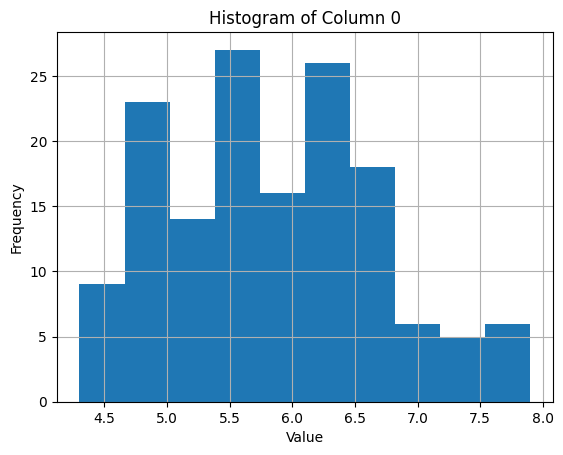

In [ ]:
#normal distribution by graphical
df[0].hist(bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column 0')
plt.show()

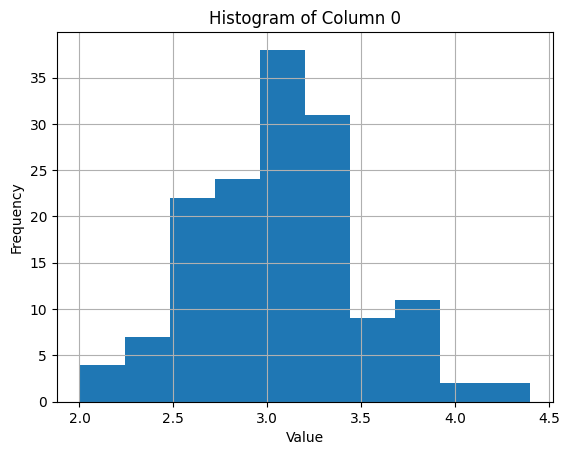

In [ ]:
#normal distribution by graphical
df[1].hist(bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column 0')
plt.show()

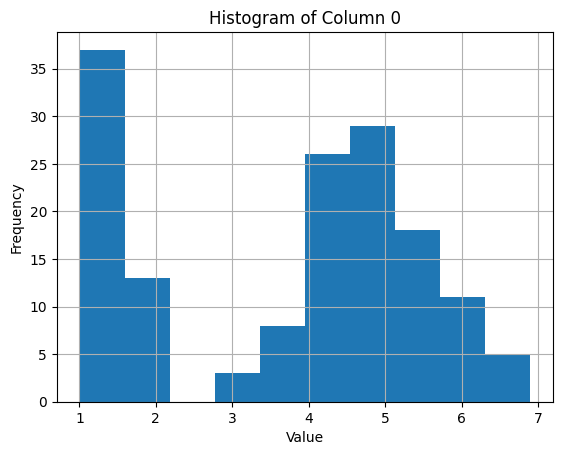

In [ ]:
#normal distribution by graphical
df[2].hist(bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column 0')
plt.show()

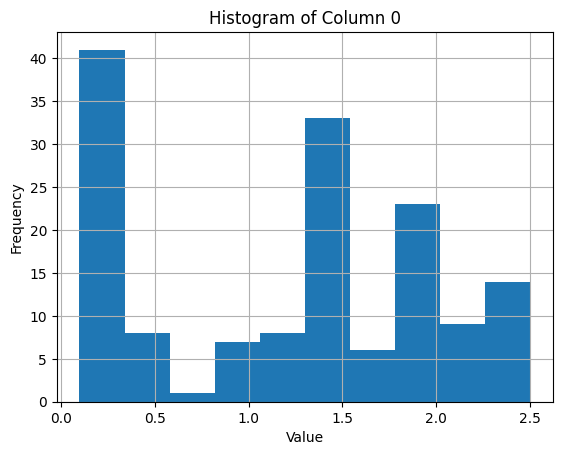

In [ ]:
#normal distribution by graphical
df[3].hist(bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column 0')
plt.show()

In [ ]:
#Question 1: find total number sample of each flower type

# Grouping by 'target' column to count the total number of samples for each flower type
flower_type_counts = df[4].value_counts()

# Display the result
print(flower_type_counts)

4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
#Question 3: What is the average (mean), median and most frequent (mode) value for each feature grouped by flower type?

grouped_stats = df.groupby(4).agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda_0>': 'mode'})

# Display the grouped statistics
print(grouped_stats)

                     0                  1                  2              \
                  mean median mode   mean median mode   mean median mode   
4                                                                          
Iris-setosa      5.006    5.0  5.0  3.418    3.4  3.4  1.464   1.50  1.5   
Iris-versicolor  5.936    5.9  5.5  2.770    2.8  3.0  4.260   4.35  4.5   
Iris-virginica   6.588    6.5  6.3  2.974    3.0  3.0  5.552   5.55  5.1   

                     3              
                  mean median mode  
4                                   
Iris-setosa      0.244    0.2  0.2  
Iris-versicolor  1.326    1.3  1.3  
Iris-virginica   2.026    2.0  1.8  


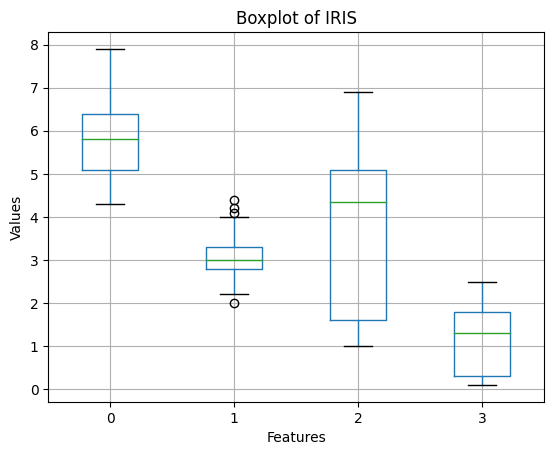

In [ ]:
#Box plot
df.boxplot(column=[0,1,2,3])
plt.title('Boxplot of IRIS')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

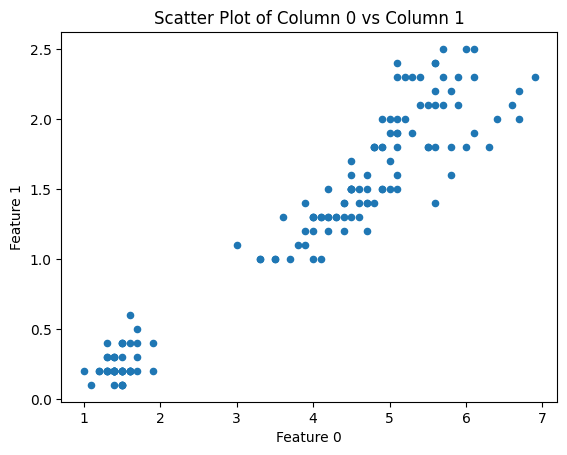

In [ ]:
#Scatter Plot
df.plot.scatter(x=2, y=3) #df.plot.scatter(x='column_x', y='column_y')
plt.title('Scatter Plot of Column 0 vs Column 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [ ]:
df[[0,1,2]]

,0,1,2
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


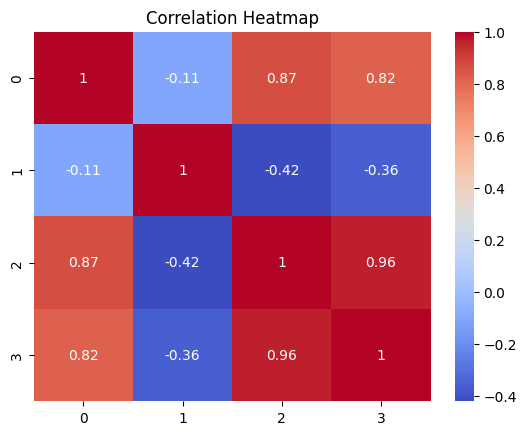

In [ ]:
#heatmap
import seaborn as sns
#   0. sepal length in cm
#   1. sepal width in cm
#   2. petal length in cm
#   3. petal width in cm
sns.heatmap(df[[0,1,2,3]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

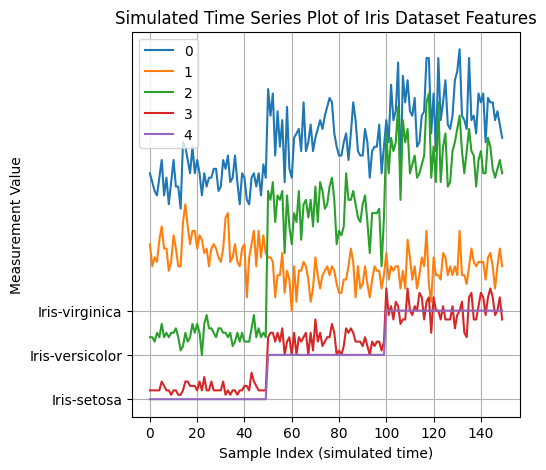

In [ ]:
# Create a simulated "time" column based on the index
df['Sample_Index'] = df.index

# Plot a "time series" for each feature
plt.figure(figsize=(5, 5))

for column in df.columns[:-1]:  # Exclude the Sample_Index column
    plt.plot(df['Sample_Index'], df[column], label=column)

plt.title('Simulated Time Series Plot of Iris Dataset Features')
plt.xlabel('Sample Index (simulated time)')
plt.ylabel('Measurement Value')
plt.legend()
plt.grid(True)
plt.show()

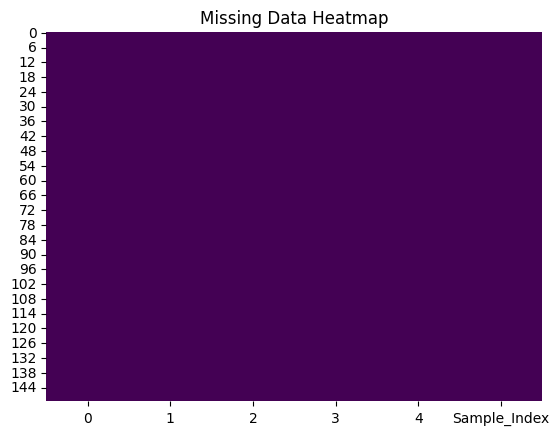

In [ ]:
#missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

DataFrame with missing values:
     A     B     C     D
0  1.0   5.0  11.0   NaN
1  2.0   NaN  12.0  18.0
2  NaN   NaN  13.0  19.0
3  4.0   8.0   NaN  20.0
4  5.0   9.0   NaN   NaN
5  NaN  10.0  16.0  22.0


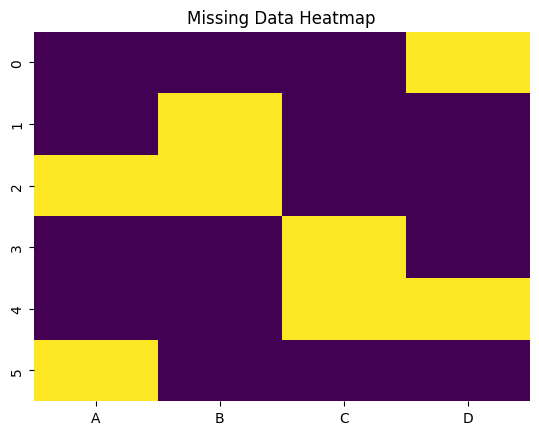

In [ ]:
# Create a sample DataFrame with missing values
data = {
    'A': [1, 2,np.nan , 4, 5, np.nan],
    'B': [5,np.nan ,np.nan , 8, 9, 10],
    'C': [11, 12, 13, np.nan, np.nan, 16],
    'D': [np.nan, 18, 19, 20, np.nan, 22]
}

df1 = pd.DataFrame(data)

# Display the DataFrame to see the missing values
print("DataFrame with missing values:")
print(df1)

sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# data quality

In [ ]:
#Check data duplication
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate records: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Number of duplicate records: 3
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [ ]:
# Verify datatyp
print("Data types of each column in the dataset:")
print(df.dtypes)

Data types of each column in the dataset:
0    float64
1    float64
2    float64
3    float64
4     object
dtype: object


In [ ]:
#validate range
# Define expected ranges for the features
expected_ranges = {
    0: (4.0, 8.0),
    1: (2.0, 4.5),
    2: (1.0, 7.0),
    3: (0.1, 3.0)
}

# Validate value ranges
def validate_ranges(df, ranges):
    for column, (min_val, max_val) in ranges.items():
        if df[column].min() < min_val or df[column].max() > max_val:
            print(f"{column} has values out of range!")
        else:
            print(f"{column} is within the expected range.")

validate_ranges(df, expected_ranges)

# Check for consistency (e.g., no negative values)
print("\nChecking for negative values:")
for column in df.columns[:-1]:  # exclude the 'species' column
    if (df[column] < 0).any():
        print(f"{column} contains negative values.")
    else:
        print(f"{column} contains no negative values.")

0 is within the expected range.
1 is within the expected range.
2 is within the expected range.
3 is within the expected range.

Checking for negative values:
0 contains no negative values.
1 contains no negative values.
2 contains no negative values.
3 contains no negative values.


In [ ]:
#outliers by iQR
def detect_outliers_iqr(df):
    outliers = pd.DataFrame(columns=df.columns)

    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    return outliers.drop_duplicates()

# Detect outliers using IQR method
iqr_outliers = detect_outliers_iqr(df)
print("\nOutliers detected using IQR:")
print(iqr_outliers)


Outliers detected using IQR:
      0    1    2    3                4
15  5.7  4.4  1.5  0.4      Iris-setosa
32  5.2  4.1  1.5  0.1      Iris-setosa
33  5.5  4.2  1.4  0.2      Iris-setosa
60  5.0  2.0  3.5  1.0  Iris-versicolor


<ipython-input-12-08b3f052da19>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, outliers_in_column])


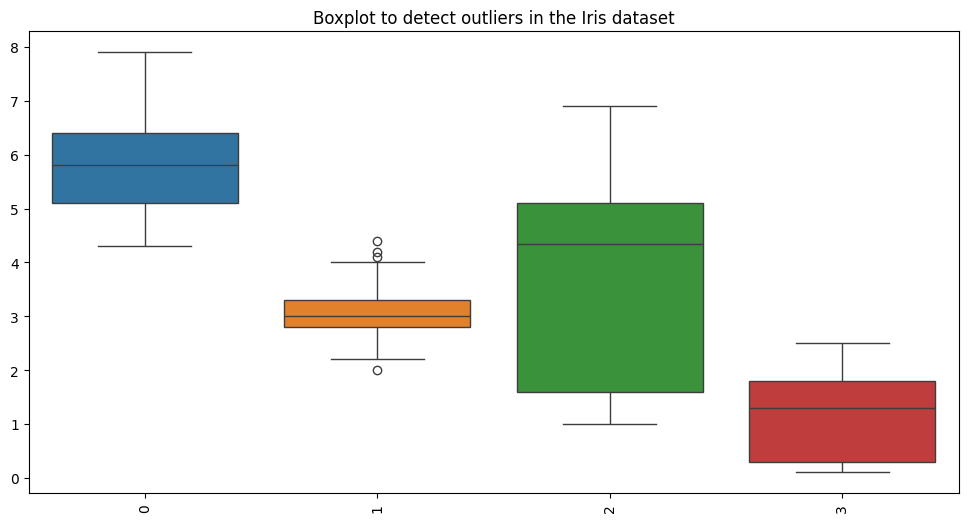

In [ ]:
#outliers using boxplot
# Create a boxplot for each feature to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot to detect outliers in the Iris dataset")
plt.xticks(rotation=90)
plt.show()

Class distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


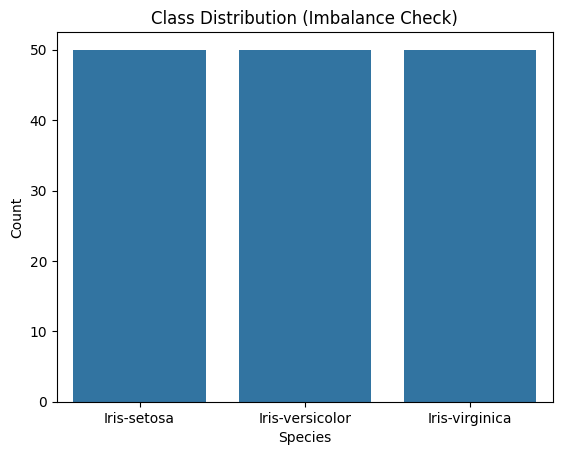

In [ ]:
#check imbalanced

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print("Class distribution:")
print(df['species'].value_counts())

# Plot the class distribution to check for imbalance
sns.countplot(x='species', data=df)
plt.title('Class Distribution (Imbalance Check)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

